# Dependency List

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import os

# 1. Prepare the files

### 1.1. Read wav files

In [43]:
# Read the original wav file
wav = r'.\wavfile\v-09-11-3-50.wav'
(file_dir, file_id) = os.path.split(wav)

print("Path: {}".format(file_dir))
print("Name: {}".format(file_id))

sampling_rate, data = wavfile.read(wav)

print("Sample rate: {0}, data size: {1}, duration: {2} seconds".format(sampling_rate, data.shape, len(data)/sampling_rate))

Path: .\wavfile
Name: v-09-11-3-50.wav
Sample rate: 44100, data size: (88200,), duration: 2.0 seconds


### 1.2. Plot the wav files

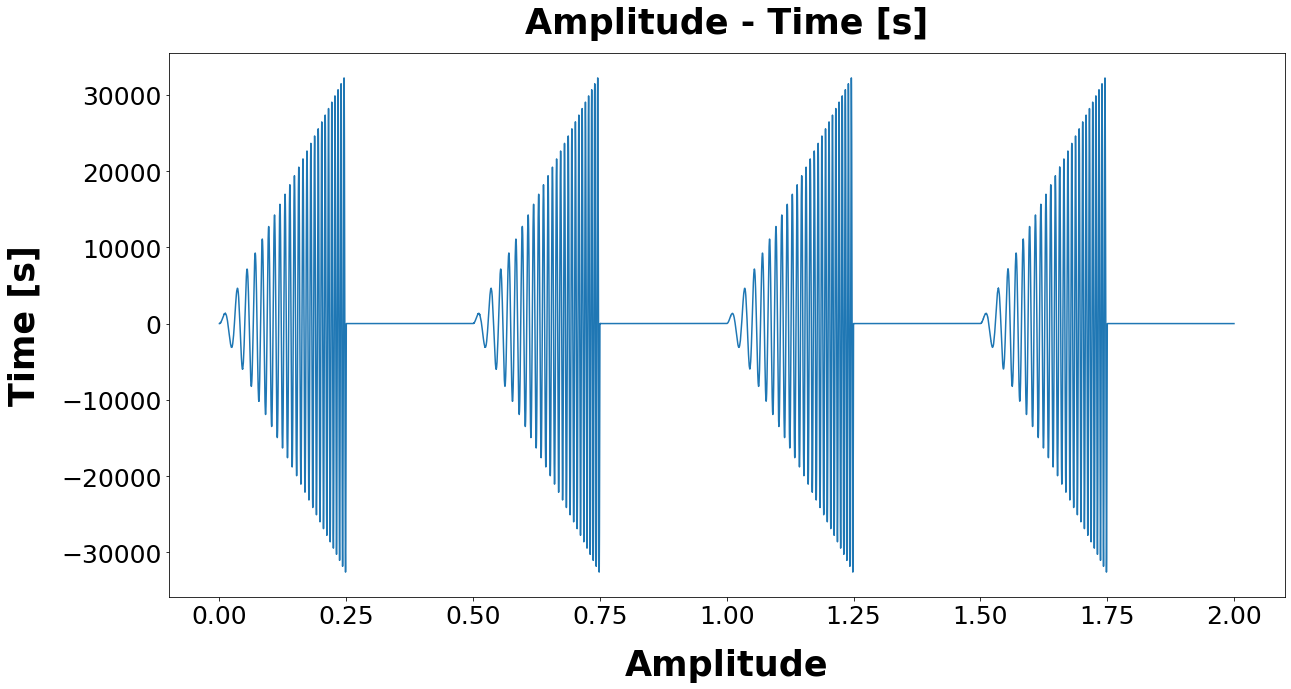

In [44]:
time = np.linspace(0, len(data)/sampling_rate, len(data))

plt.figure(figsize = (20, 10))
plt.plot(time, data)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Amplitude", fontsize = 35, weight = "bold", labelpad = 20)
plt.ylabel("Time [s]", fontsize = 35, weight = "bold", labelpad = 20)
plt.title("Amplitude - Time [s]", fontsize = 35, weight = "bold", pad = 20)
plt.show()

### 1.3. Fast Fourier Transform

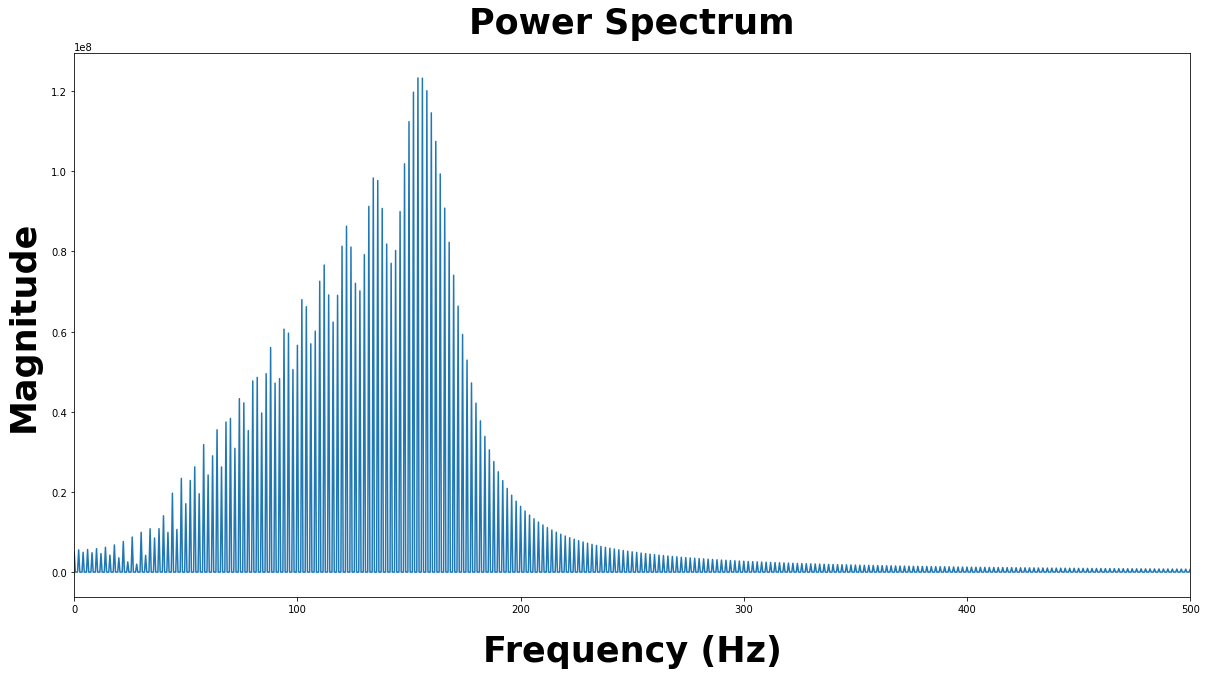

In [45]:
fft = np.fft.fft(data)
magnitude = np.abs(fft)

f = np.linspace(0, sampling_rate, len(magnitude), endpoint = False)
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize = (20, 10))

plt.plot(left_f, left_spectrum)
plt.xlim(0 , 500)
plt.xlabel("Frequency (Hz)", fontsize = 35, weight = "bold", labelpad = 20)
plt.ylabel("Magnitude", fontsize = 35, weight = "bold", labelpad = 10)
plt.title("Power Spectrum", fontsize = 35, weight = "bold", pad = 20)
plt.show()

# 2. Generate the .AHAP file

### 2.1. Control the Envelope

In [46]:
duration = 1.75

point = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])
amp = np.array([1, 0, 1, 0, 1, 0, 1, 0])

sampling_rate = 22500

pint_sample = point * sampling_rate

time = np.linspace(0, duration, int(sampling_rate * duration))

print(pint_sample, amp)
print(len(time))

[    0.  5625. 11250. 16875. 22500. 28125. 33750. 39375.] [1 0 1 0 1 0 1 0]
39375
